In [1]:
# standard imports and setups
%pylab inline

import pylab as pl
import pandas as pd
import numpy as np
import zipfile as zp
import os
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# working from Citibike data
path = os.getenv('PUIDATA')+'/'

datestring = '201502'
#bring in the citybike data from February 2015
!wget "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip" -O "{path}{datestring}-citibike-tripdata.zip"

zip = zp.ZipFile(path+datestring+'-citibike-tripdata.zip')
zip.extractall(path)

!rm "{path}{datestring}-citibike-tripdata.zip"

data = pd.read_csv(path+datestring+'-citibike-tripdata.csv')

data.head()

--2016-10-25 23:30:01--  https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
Resolving s3.amazonaws.com... 54.231.83.18
Connecting to s3.amazonaws.com|54.231.83.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4821145 (4.6M) [application/zip]
Saving to: “/home/cusp/tw1574/PUIdata/201502-citibike-tripdata.zip”

100%[======================================>] 4,821,145   1016K/s   in 11s     

2016-10-25 23:30:13 (434 KB/s) - “/home/cusp/tw1574/PUIdata/201502-citibike-tripdata.zip” saved [4821145/4821145]



,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [3]:
# simple overview of the data
data.count()

tripduration               196930
starttime                  196930
stoptime                   196930
start station id           196930
start station name         196930
start station latitude     196930
start station longitude    196930
end station id             196930
end station name           196930
end station latitude       196930
end station longitude      196930
bikeid                     196930
usertype                   196930
birth year                 194663
gender                     196930
dtype: int64

In [4]:
# convert starttime to datetime and extracting the hour
data['starttime'] = pd.to_datetime(data['starttime'])
data['starthour'] = data.starttime.apply(lambda x: x.hour)

In [5]:
# create a reduce dataset to morning hours and display 
data_morning = data[(data.starthour >= 6) & (data.starthour <= 9)]
data_morning.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starthour
229,630,2015-02-01 06:02:00,2/1/2015 6:13,523,W 38 St & 8 Ave,40.754666,-73.991382,527,E 33 St & 2 Ave,40.744023,-73.976056,16971,Subscriber,1975.0,2,6
230,760,2015-02-01 06:07:00,2/1/2015 6:20,379,W 31 St & 7 Ave,40.749156,-73.991600,538,E 48 St & Madison Ave,40.756660,-73.976684,18093,Subscriber,1972.0,1,6
231,495,2015-02-01 06:08:00,2/1/2015 6:17,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,243,Fulton St & Rockwell Pl,40.688226,-73.979382,18485,Subscriber,1983.0,2,6
232,1015,2015-02-01 06:09:00,2/1/2015 6:26,350,Clinton St & Grand St,40.715595,-73.987030,444,Broadway & W 24 St,40.742354,-73.989151,19287,Subscriber,1981.0,1,6
233,1615,2015-02-01 06:10:00,2/1/2015 6:37,477,W 41 St & 8 Ave,40.756405,-73.990026,473,Rivington St & Chrystie St,40.721101,-73.991925,15676,Customer,NaN,0,6


In [6]:
# stats about the reduced dataframe
data_morning.count()

tripduration               43866
starttime                  43866
stoptime                   43866
start station id           43866
start station name         43866
start station latitude     43866
start station longitude    43866
end station id             43866
end station name           43866
end station latitude       43866
end station longitude      43866
bikeid                     43866
usertype                   43866
birth year                 43645
gender                     43866
starthour                  43866
dtype: int64

In [7]:
# reducing the number of columns of the dataframe
data_morning = data_morning[['birth year','starthour','tripduration']]
data_morning.columns

Index(['birth year', 'starthour', 'tripduration'], dtype='object')

In [8]:
# setup the age and age bins against which we would plot 
data_morning['age'] = 2016-data_morning['birth year']
bins = [0, 20, 30, 40, 50, 60, 70]
data_morning['age_category'] = pd.cut(data_morning['age'], bins)

In [25]:
# convert tripduration to int and create trip duration mins column
data_morning['tripduration'] = data_morning['tripduration'].astype('int')
data_morning['tripduration_mins'] = data_morning['tripduration']/60

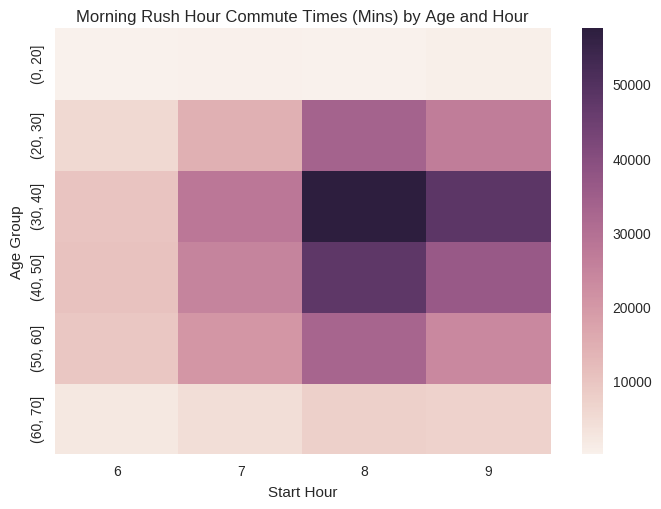

In [32]:
# Create the heatmap
ax = plt.axes()
sns.heatmap(data_morning.pivot_table(columns="starthour", index="age_category", values="tripduration_mins",aggfunc=np.sum))

ax.set_title('Morning Rush Hour Commute Times (Mins) by Age and Hour')
ax.set_xlabel('Start Hour')
ax.set_ylabel('Age Group')
plt.show()